In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline
from scipy.interpolate import lagrange
from scipy.interpolate import make_interp_spline

In [16]:
# Set default figure size for all plots
plt.rcParams['figure.figsize'] = (10, 6)

# 1. Ordinary Polynomial

## 1.1 The Basis Functions

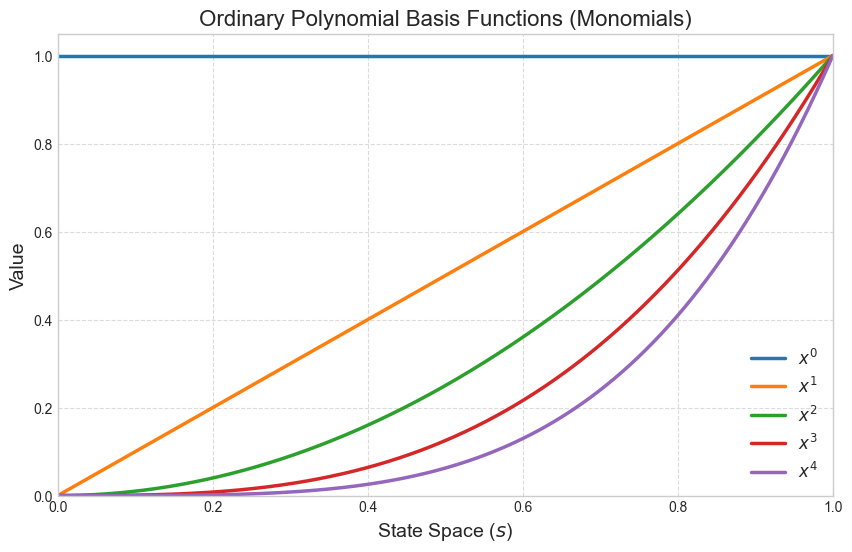

In [17]:
# Setup
x = np.linspace(0, 1, 500)
degrees = 5  # Plot degrees 0 to 4

plt.figure()
plt.style.use('seaborn-v0_8-whitegrid') # Optional: Makes it look nicer

# Loop to plot each basis function
for k in range(degrees):
    y = x ** k
    plt.plot(x, y, linewidth=2.5, label=f'$x^{k}$')

# Formatting
plt.title('Ordinary Polynomial Basis Functions (Monomials)', fontsize=16)
plt.xlabel('State Space ($s$)', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.xlim(0, 1)
plt.ylim(0, 1.05)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

## 1.2 Multi-Collinearity

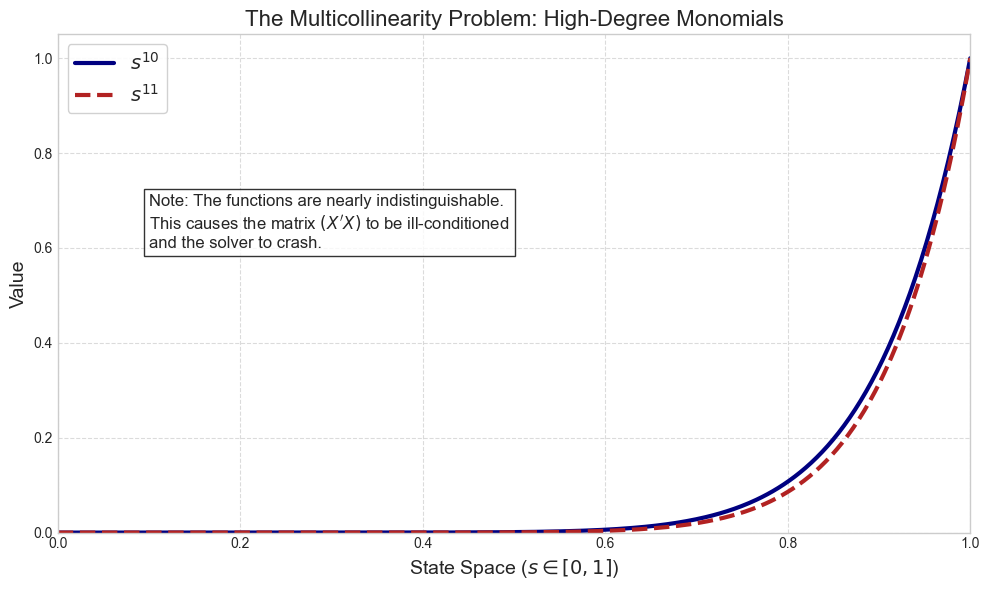

In [18]:
# Setup
x = np.linspace(0, 1, 500)

plt.figure()
plt.style.use('seaborn-v0_8-whitegrid')

# Plot x^10 and x^11
plt.plot(x, x**10, linewidth=3, label='$s^{10}$', color='navy')
plt.plot(x, x**11, linewidth=3, label='$s^{11}$', color='firebrick', linestyle='--')

# Formatting
plt.title('The Multicollinearity Problem: High-Degree Monomials', fontsize=16)
plt.xlabel(r'State Space ($s \in [0,1]$)', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend(fontsize=14, loc='upper left', frameon=True, framealpha=0.9)
plt.xlim(0, 1)
plt.ylim(0, 1.05)
plt.grid(True, linestyle='--', alpha=0.7)

# Annotation to explain the concept directly on the graph
plt.text(0.1, 0.6, 
         "Note: The functions are nearly indistinguishable.\n"
         "This causes the matrix $(X'X)$ to be ill-conditioned\n"
         "and the solver to crash.", 
         fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

## 1.3 Runge's Phenomenon

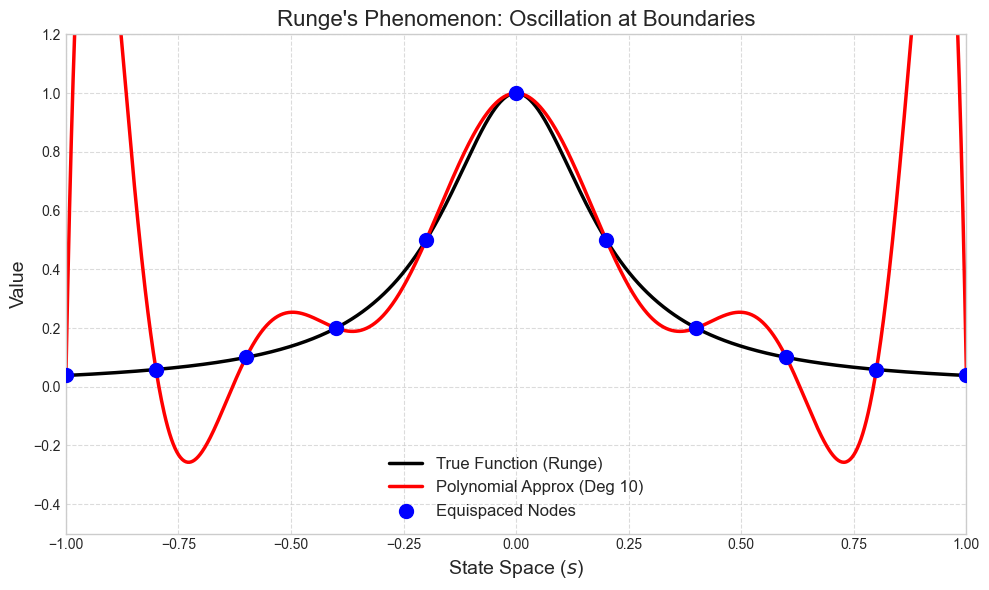

In [19]:
# Setup
x_fine = np.linspace(-1, 1, 1000)

# True Function (Runge Function)
def runge(x):
    return 1 / (1 + 25 * x**2)

# Equispaced Nodes for interpolation
N = 11 # 11 points = 10th degree polynomial
x_nodes = np.linspace(-1, 1, N)
y_nodes = runge(x_nodes)

# Polynomial Interpolation (Lagrange)
poly = lagrange(x_nodes, y_nodes)
y_poly = poly(x_fine)

# Plotting
plt.figure()
plt.style.use('seaborn-v0_8-whitegrid')

# Plot True Function
plt.plot(x_fine, runge(x_fine), linewidth=2.5, label='True Function (Runge)', color='black')

# Plot Approximation
plt.plot(x_fine, y_poly, linewidth=2.5, label=f'Polynomial Approx (Deg {N-1})', color='red')

# Plot the training nodes
plt.scatter(x_nodes, y_nodes, color='blue', s=100, zorder=5, label='Equispaced Nodes')

# Formatting
plt.title("Runge's Phenomenon: Oscillation at Boundaries", fontsize=16)
plt.xlabel('State Space ($s$)', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.xlim(-1, 1)
plt.ylim(-0.5, 1.2) # Limit y-axis to see the wiggles clearly
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# 2. Chebyshev Polynomial

## 2.1 The Basis Functions

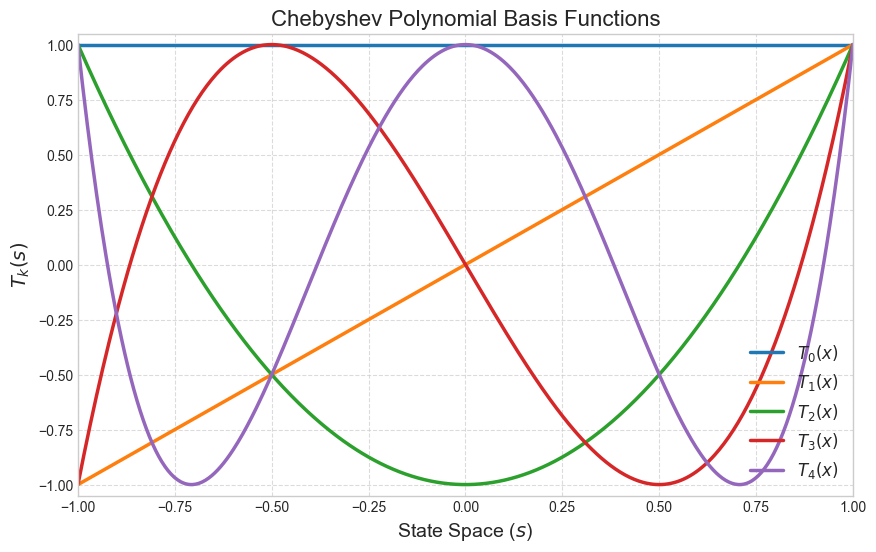

In [20]:
# Setup
x = np.linspace(-1, 1, 500)
degrees = 5  # Plot T_0 to T_4

plt.figure()
plt.style.use('seaborn-v0_8-whitegrid')

# Loop to plot each basis function
for k in range(degrees):
    # Definition of Chebyshev Polynomial of the first kind
    y = np.cos(k * np.arccos(x)) 
    plt.plot(x, y, linewidth=2.5, label=f'$T_{k}(x)$')

# Formatting
plt.title('Chebyshev Polynomial Basis Functions', fontsize=16)
plt.xlabel('State Space ($s$)', fontsize=14)
plt.ylabel('$T_k(s)$', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.xlim(-1, 1)
plt.ylim(-1.05, 1.05)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

# 3. Cubic B-Spline

## 3.1 The Basis Functions

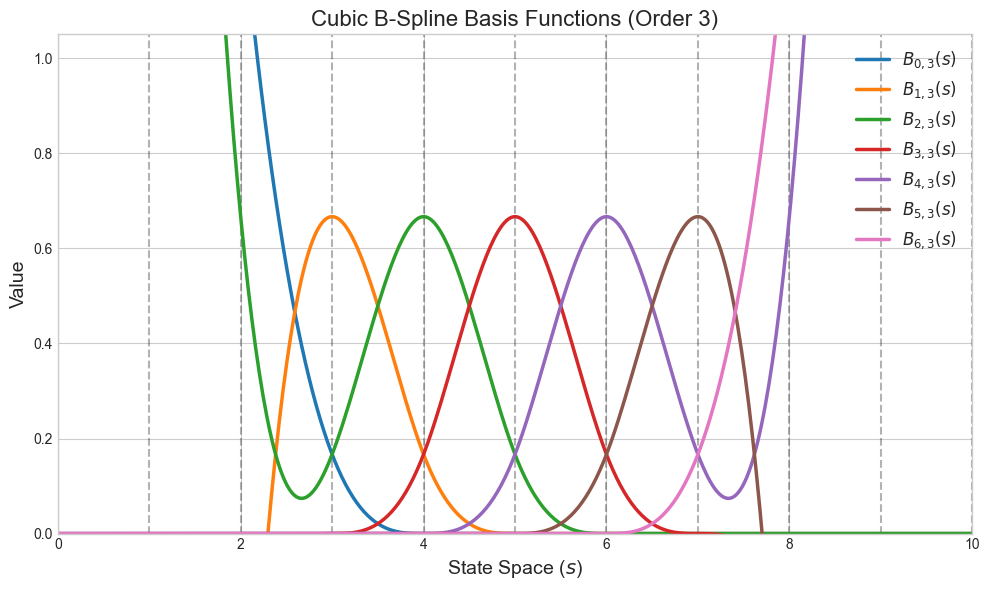

In [21]:
# Setup
degree = 3  # Cubic
knots = np.arange(0, 11)  # Uniform knots from 0 to 10
n_knots = len(knots)
n_coeffs = n_knots - degree - 1 # Number of basis functions

x = np.linspace(0, 10, 500)

plt.figure()
plt.style.use('seaborn-v0_8-whitegrid')

# Plot Vertical Knot Lines
for k in knots:
    plt.axvline(k, color='black', linestyle='--', alpha=0.3)

# Loop to create and plot each basis function
# We do this by setting one coefficient to 1 and the rest to 0 (One-Hot Encoding)
for i in range(n_coeffs):
    coeffs = np.zeros(n_coeffs)
    coeffs[i] = 1.0
    
    # Create the spline object for this specific basis
    spl = BSpline(knots, coeffs, degree)
    y = spl(x)
    
    # Only plot if the function is visible in the domain to keep the graph clean
    if np.max(y) > 0:
        plt.plot(x, y, linewidth=2.5, label=f'$B_{{{i},{degree}}}(s)$')

# Formatting
plt.title(f'Cubic B-Spline Basis Functions (Order {degree})', fontsize=16)
plt.xlabel('State Space ($s$)', fontsize=14)
plt.ylabel('Value', fontsize=14)
# Adjust legend to not cover data
# plt.legend(fontsize=10, loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=5) 
plt.legend(fontsize=12, loc='best')
plt.xlim(0, 10)
plt.ylim(0, 1.05)
plt.tight_layout()

plt.show()

## 3.2 Kinks

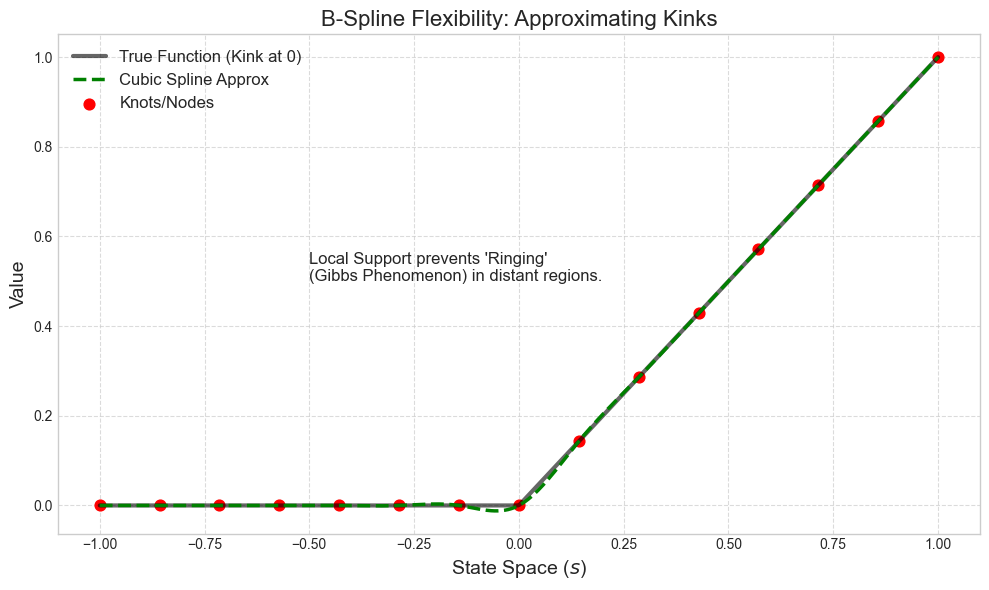

In [22]:
# Setup
x_true = np.linspace(-1, 1, 500)
# Function with a kink at 0 (e.g., max(0, x))
y_true = np.maximum(0, x_true) 

# Nodes for spline
x_nodes = np.linspace(-1, 1, 15)
y_nodes = np.maximum(0, x_nodes)

# Create B-Spline (k=1 for linear spline to perfectly hit kink, or k=3 for smoothing)
# Here we use k=3 (cubic) to show it handles it reasonably well without global oscillation
spl = make_interp_spline(x_nodes, y_nodes, k=3)
y_spline = spl(x_true)

plt.figure()
plt.style.use('seaborn-v0_8-whitegrid')

# Plot True Kink
plt.plot(x_true, y_true, linewidth=3, label='True Function (Kink at 0)', color='black', alpha=0.6)

# Plot Spline Approx
plt.plot(x_true, y_spline, linewidth=2.5, label='Cubic Spline Approx', color='green', linestyle='--')

# Plot Nodes
plt.scatter(x_nodes, y_nodes, color='red', s=60, label='Knots/Nodes')

# Formatting
plt.title('B-Spline Flexibility: Approximating Kinks', fontsize=16)
plt.xlabel('State Space ($s$)', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend(fontsize=12, loc='upper left')
plt.text(-0.5, 0.5, "Local Support prevents 'Ringing'\n(Gibbs Phenomenon) in distant regions.", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

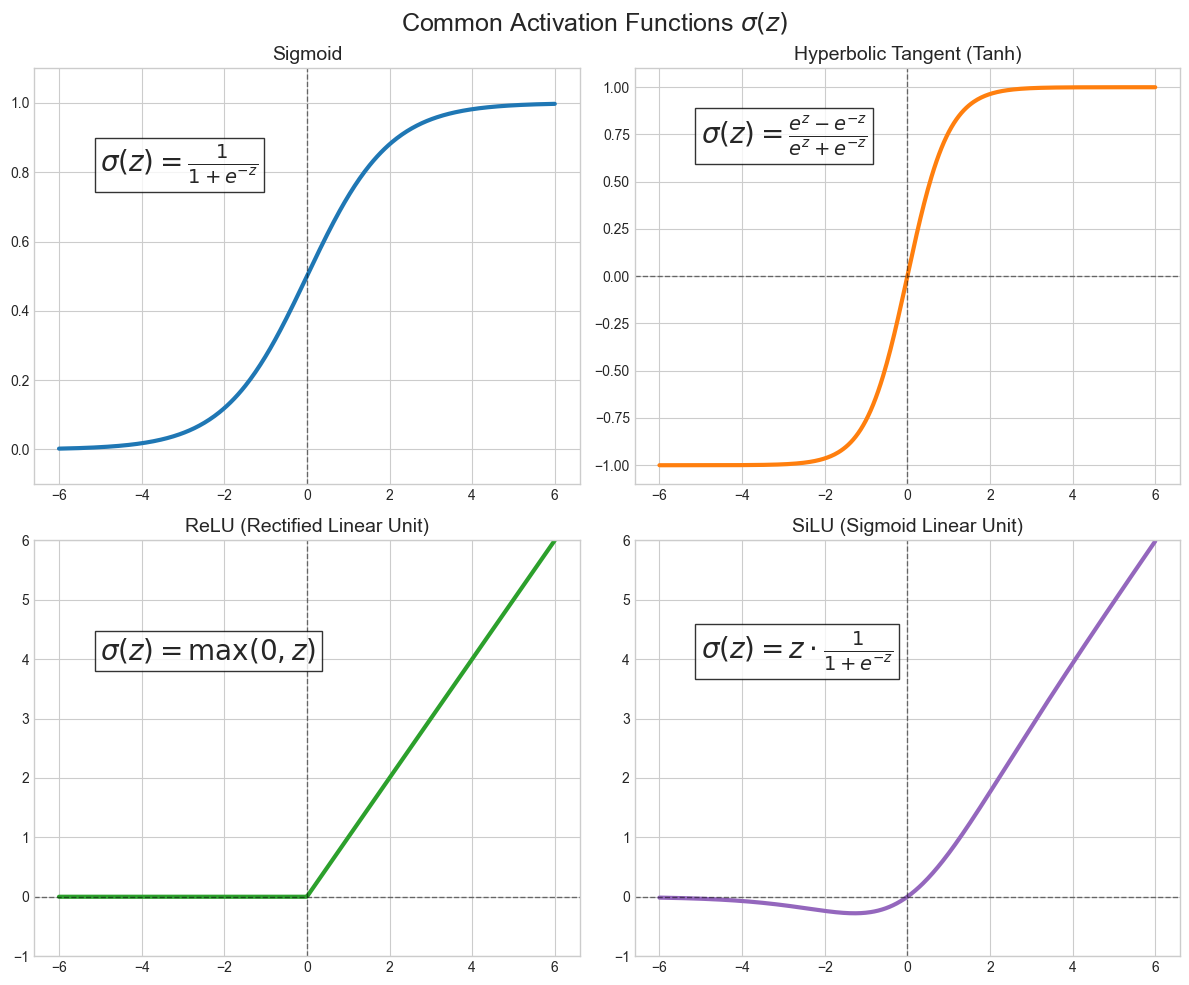

In [24]:
# Define the domain (Standard -6 to 6 usually covers the interesting parts)
z = np.linspace(-6, 6, 400)

# Define functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def tanh(z):
    return np.tanh(z)

def silu(z): # Also known as Swish
    return z * sigmoid(z)

# Setup Plot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
plt.style.use('seaborn-v0_8-whitegrid')
fig.suptitle(r'Common Activation Functions $\sigma(z)$', fontsize=18)

# Plot 1: Sigmoid
axes[0, 0].plot(z, sigmoid(z), color='tab:blue', linewidth=3)
axes[0, 0].set_title('Sigmoid', fontsize=14)
axes[0, 0].set_ylim(-0.1, 1.1)
axes[0, 0].axvline(0, color='black', linewidth=1, alpha=0.5, linestyle='--')
axes[0, 0].text(-5, 0.8, r'$\sigma(z) = \frac{1}{1+e^{-z}}$', fontsize=20, bbox=dict(facecolor='white', alpha=0.8))

# Plot 2: Tanh
axes[0, 1].plot(z, tanh(z), color='tab:orange', linewidth=3)
axes[0, 1].set_title('Hyperbolic Tangent (Tanh)', fontsize=14)
axes[0, 1].set_ylim(-1.1, 1.1)
axes[0, 1].axvline(0, color='black', linewidth=1, alpha=0.5, linestyle='--')
axes[0, 1].axhline(0, color='black', linewidth=1, alpha=0.5, linestyle='--')
axes[0, 1].text(-5, 0.7, r'$\sigma(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$', fontsize=20, bbox=dict(facecolor='white', alpha=0.8))

# Plot 3: ReLU
axes[1, 0].plot(z, relu(z), color='tab:green', linewidth=3)
axes[1, 0].set_title('ReLU (Rectified Linear Unit)', fontsize=14)
axes[1, 0].set_ylim(-1, 6)
axes[1, 0].axvline(0, color='black', linewidth=1, alpha=0.5, linestyle='--')
axes[1, 0].axhline(0, color='black', linewidth=1, alpha=0.5, linestyle='--')
axes[1, 0].text(-5, 4, r'$\sigma(z) = \max(0, z)$', fontsize=20, bbox=dict(facecolor='white', alpha=0.8))

# Plot 4: SiLU
axes[1, 1].plot(z, silu(z), color='tab:purple', linewidth=3)
axes[1, 1].set_title('SiLU (Sigmoid Linear Unit)', fontsize=14)
axes[1, 1].set_ylim(-1, 6)
axes[1, 1].axvline(0, color='black', linewidth=1, alpha=0.5, linestyle='--')
axes[1, 1].axhline(0, color='black', linewidth=1, alpha=0.5, linestyle='--')
axes[1, 1].text(-5, 4, r'$\sigma(z) = z \cdot \frac{1}{1+e^{-z}}$', fontsize=20, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()